# Evolution Strategies

So far, we have only performed one random step every time 
In this part we are going to use evolution strategies to optimize our models.
Evolution strategies often use multiple samples to compare different mutations.
These mutations are compared, selected or graded in a certain way.

We are going to train the same linear regression model on the Boston houses dataset.



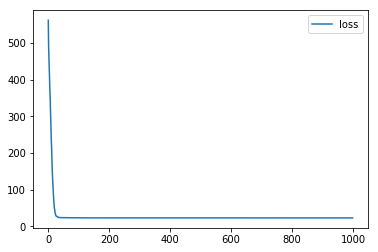

loss:  22.983537280227754
validation loss 20.742980023662952


In [238]:
import numpy as np, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

boston = datasets.load_boston()

X = boston['data']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

y = boston['target']
slr = StandardScaler()
X_train = slr.fit_transform(X_train)
X_test = slr.transform(X_test)

def mse(y_true, y_pred):
    return np.average(np.square(y_true - y_pred))

def linear_regression(weights, bias, X, y):
    y_pred = X.dot(weights) + bias
    return mse(y, y_pred)

npop = 32 # population size
sigma = 0.5 # noise standard deviation

W = np.zeros(X.shape[1])
b = np.array([0])

sigma_decay = 0.995

num_iters = 1000

loss_history = []
R_start = linear_regression(W, b, X_train, y_train)

for i in range(num_iters):
    N_W = np.random.randn(npop, W.shape[0]) * sigma
    N_b = np.random.randn(npop, 1) * sigma
    R = np.zeros(npop)
    
    for j in range(npop):
        W_try = W + N_W[j]
        b_try = b + N_b[j] 
        R[j] = linear_regression(W_try, b_try, X_train, y_train)

    R_min = np.argmin(R)
    W_2 = N_W[R_min]
    b_2 = N_b[R_min]

    if R[R_min] <= R_start:
        W = W + W_2
        b = b + b_2
        R_start = R[R_min]

    loss_history.append(R_start)
    sigma *= sigma_decay

loss_line, = plt.plot(np.array(loss_history), label='loss')
plt.legend(handles=[loss_line])
plt.show()
print("loss: ", loss_history[-1])

print("validation loss", linear_regression(W, b, X_test, y_test))


We see that the training loss drop much more quickly when we have a larger population size.

# References
https://blog.openai.com/evolution-strategies/

https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d